In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target

<AxesSubplot:>

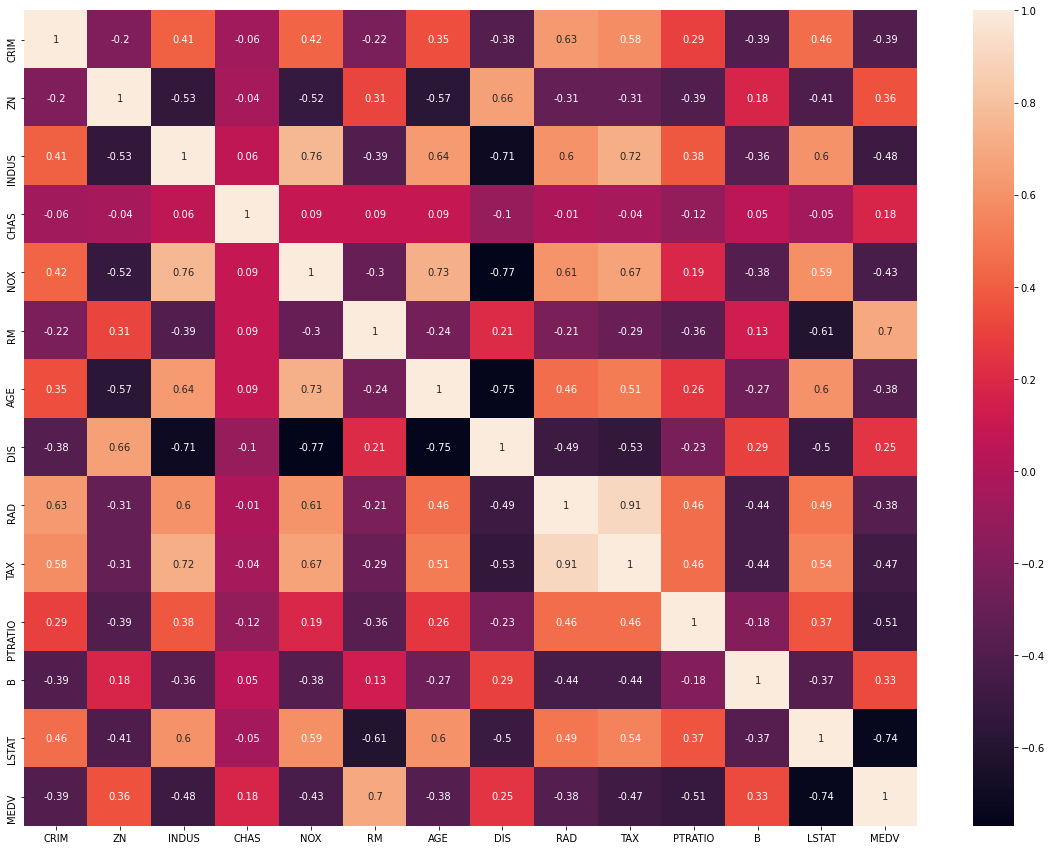

In [19]:
plt.subplots(figsize=(20,15))
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

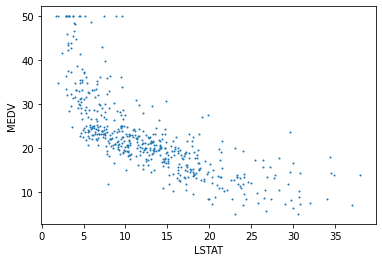

In [25]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.scatter(x=boston.LSTAT, y=boston.MEDV, s=1)

In [7]:
X = boston.drop(columns='MEDV')
Y = boston['MEDV']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [11]:
def fit_and_print_results(lin_model):
    lin_model.fit(X_train, Y_train)
    y_train_predict = lin_model.predict(X_train)
    mse = mean_squared_error(Y_train, y_train_predict)
    r2 = r2_score(Y_train, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    print("\n")

    y_test_predict = lin_model.predict(X_test)
    mse = mean_squared_error(Y_test, y_test_predict)
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))

In [60]:
model = LinearRegression()
fit_and_print_results(model)

The model performance for training set
--------------------------------------
MSE is 22.477090408387635
R2 score is 0.7383393920590519


The model performance for testing set
--------------------------------------
MSE is 20.869292183770735
R2 score is 0.7334492147453086


In [61]:
model = Ridge(alpha=0.01)
fit_and_print_results(model)

The model performance for training set
--------------------------------------
MSE is 22.47714515267104
R2 score is 0.7383387547691618


The model performance for testing set
--------------------------------------
MSE is 20.878357369399122
R2 score is 0.7333334306388593


In [62]:
model = Lasso(alpha=0.001)
fit_and_print_results(model)

The model performance for training set
--------------------------------------
MSE is 22.477486861047222
R2 score is 0.7383347768690054


The model performance for testing set
--------------------------------------
MSE is 20.893698356939417
R2 score is 0.7331374895288572


In [63]:
model.coef_

array([-1.30645400e-01,  4.94918886e-02, -2.03930673e-04,  2.68350592e+00,
       -1.55916830e+01,  3.41302343e+00,  9.00486367e-04, -1.48705355e+00,
        3.63722569e-01, -1.32136999e-02, -9.48907330e-01,  1.17601808e-02,
       -5.94960807e-01])

In [13]:
X = np.expand_dims(boston['LSTAT'], axis=1)

In [17]:
model = LinearRegression()
fit_and_print_results(model)

The model performance for training set
--------------------------------------
MSE is 38.45801898706332
R2 score is 0.5523019908037391


The model performance for testing set
--------------------------------------
MSE is 38.82182901428658
R2 score is 0.5041523728903132


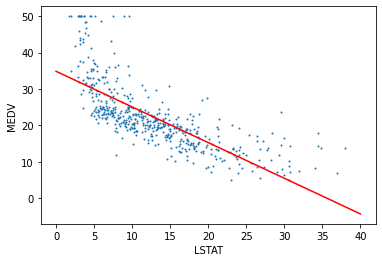

In [21]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
f = lambda x: x * model.coef_ + model.intercept_
plt.plot([0, 40], [f(0), f(40)], color='red')
plt.scatter(x=boston.LSTAT, y=boston.MEDV, s=1)